In [1]:
from scipy.stats import mannwhitneyu, ttest_ind,f_oneway
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

sns.set(style='white',
    palette='deep',
    font='sans-serif',
    font_scale=1.3,)

%config Completer.use_jedi = False


In [2]:
color = sns.color_palette("hls", 8)
sc = [color[1], color[3], color[-1], color[-2]]

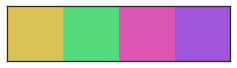

In [3]:
sns.palplot(sc)

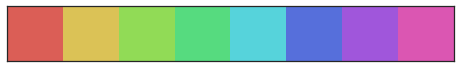

In [4]:
sns.palplot(color)

In [5]:
df = pd.read_excel('./volcannoplot.xlsx',sheet_name = 'Sheet1')
repeats = int(df.shape[1]/2)

In [6]:
m2 = ['2-mer' for i in range(500)]
m3 = ['3-mer' for i in range(500)]
m4 = ['4-mer' for i in range(500)]
m5 = ['5-mer' for i in range(56)]
m2.extend(m3)
m2.extend(m4)
m2.extend(m5)

In [7]:
kmer = pd.Series(m2).to_frame(name = 'k-mer')

In [8]:
df

,cancer,Unnamed: 1,Unnamed: 2,normal,Unnamed: 4,Unnamed: 5
0,103.858792,105.171629,105.658479,37.257838,36.836938,37.040838
1,64.570748,63.780800,63.624223,31.295297,30.165140,30.791198
2,62.847413,62.462784,62.646626,33.818692,35.799055,34.376704
3,62.240456,63.367996,61.604204,45.534901,44.177574,43.988930
4,61.335766,62.215277,62.448854,19.453824,19.945539,20.983919
...,...,...,...,...,...,...
1551,0.000384,0.000641,0.001278,0.000005,0.000005,0.000005
1552,0.000382,0.000639,0.001282,0.000005,0.000005,0.000005
1553,0.000383,0.000637,0.001285,0.000005,0.000005,0.000005
1554,0.000382,0.000639,0.001283,0.000005,0.000005,0.000005


In [9]:
def perturbation(ts):
    res = []
    c = ts.values[:repeats]
    n = ts.values[repeats:]
    
    mn = n.mean()
    mc = c.mean()
    
    #if len(np.unique(c)) <3: 
        
    noise = np.random.normal(0, c.mean(), len(c))/5
    c = noise+mc   
    if len(np.unique(n)) < 3: 
        
        noise = np.random.normal(0, n.mean(), len(n))/5
        n = noise+mn 

    return np.concatenate((c, n))

In [10]:
def get_p(ts):
    c = ts.tolist()[:repeats]
    n = ts.tolist()[repeats:]
    manuwhite_p = mannwhitneyu(c, n, use_continuity=True, alternative='two-sided').pvalue
    
    ttest_p = ttest_ind(c, n, equal_var =False).pvalue
    
    oneway_ANOVA_p = f_oneway(c,n).pvalue
    
    return -np.log10(manuwhite_p), -np.log10(ttest_p), -np.log10(oneway_ANOVA_p)

In [11]:
df = df.apply(perturbation,axis=1).apply(pd.Series)

In [12]:
dfres = df.apply(get_p,axis=1).apply(pd.Series)
dfres.columns = ['manuwhite_p', 'ttest_p', 'oneway_ANOVA_p']


l1 = df[[0,1,2]].mean(axis=1)
l2 = df[[3,4,5]].mean(axis=1)
fc = np.log2(l1/l2).to_frame(name = 'log2_fold_change')
fc= fc.join(np.log10(l1/l2).to_frame(name = 'log10_fold_change'))

dfp = fc.join(dfres)
dfp = dfp.join(kmer)

In [13]:
dfp

,log2_fold_change,log10_fold_change,manuwhite_p,ttest_p,oneway_ANOVA_p,k-mer
0,1.582456,0.476367,1.09229,2.103085,3.438405,2-mer
1,1.341678,0.403885,1.09229,2.543944,4.201057,2-mer
2,0.826719,0.248867,1.09229,0.890345,1.176223,2-mer
3,0.446312,0.134353,1.09229,2.495636,3.457769,2-mer
4,1.574385,0.473937,1.09229,1.793578,2.798627,2-mer
...,...,...,...,...,...,...
1551,7.080518,2.131448,1.09229,1.711469,2.674808,5-mer
1552,7.174575,2.159762,1.09229,3.261568,5.732268,5-mer
1553,7.400389,2.227739,1.09229,2.225883,3.682763,5-mer
1554,7.311324,2.200928,1.09229,3.425674,6.067628,5-mer


(-0.5, 9)

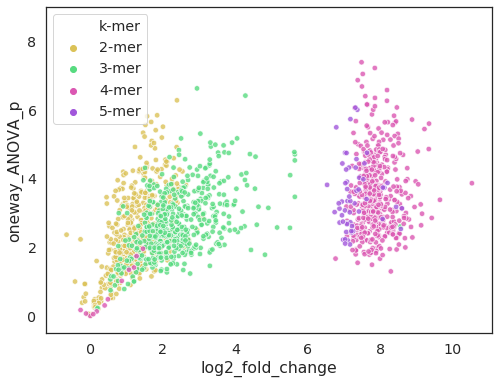

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x = 'log2_fold_change', y = 'oneway_ANOVA_p', 
                edgecolor = 'w', s = 30,
                data = dfp, hue = 'k-mer', ax = ax, 
                palette = sc, alpha = 0.8)

#ax.set_xlim(-1,3.5)
ax.set_ylim(-0.5,9)

(-0.5, 8)

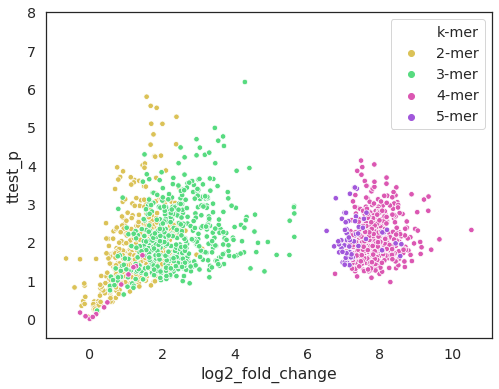

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x = 'log2_fold_change', y = 'ttest_p', 
                edgecolor = 'w', s = 30,
                data = dfp, hue = 'k-mer', ax = ax, 
                palette = sc, alpha = 1)

ax.set_ylim(-0.5,8)